In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [53]:
filename = 'data.csv'

In [54]:
df = pd.read_csv(filename)


In [55]:
count_true = df['ordered'].value_counts()[True]
if count_true == df.shape[0]:
    print("todos se ordenaron")
else:
    print("no se ordenaron todos")


todos se ordenaron


In [56]:
df.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1, inplace=True)

In [57]:
df = df[df['method'] != 'binarySort']
df

,method,size,range,distribution,ordered,time
0,quickSort,1000000,10000,uniform,True,1.809066
1,mergeSort,1000000,10000,uniform,True,2.103971
3,quickSort,2000000,10000,uniform,True,3.571438
4,mergeSort,2000000,10000,uniform,True,4.668882
6,quickSort,3000000,10000,uniform,True,5.669242
...,...,...,...,...,...,...
955,binarySortV2,6000000,200000,left_skewed,True,4.188003
956,binarySortV2,7000000,200000,left_skewed,True,4.751819
957,binarySortV2,8000000,200000,left_skewed,True,6.341060
958,binarySortV2,9000000,200000,left_skewed,True,6.361203


In [58]:
df['method'] = df['method'].replace('binarySortV2', 'binarySort')
df

,method,size,range,distribution,ordered,time
0,quickSort,1000000,10000,uniform,True,1.809066
1,mergeSort,1000000,10000,uniform,True,2.103971
3,quickSort,2000000,10000,uniform,True,3.571438
4,mergeSort,2000000,10000,uniform,True,4.668882
6,quickSort,3000000,10000,uniform,True,5.669242
...,...,...,...,...,...,...
955,binarySort,6000000,200000,left_skewed,True,4.188003
956,binarySort,7000000,200000,left_skewed,True,4.751819
957,binarySort,8000000,200000,left_skewed,True,6.341060
958,binarySort,9000000,200000,left_skewed,True,6.361203


In [59]:
def format_number(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'  # Formato para millones
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'  # Formato para miles
    else:
        return str(int(x))  # Para números más pequeños
colors = ['orange', 'green', 'blue']
color_map = {
    'binarySort': 'blue',
    'mergeSort': 'green',
    'quickSort': 'orange',
}


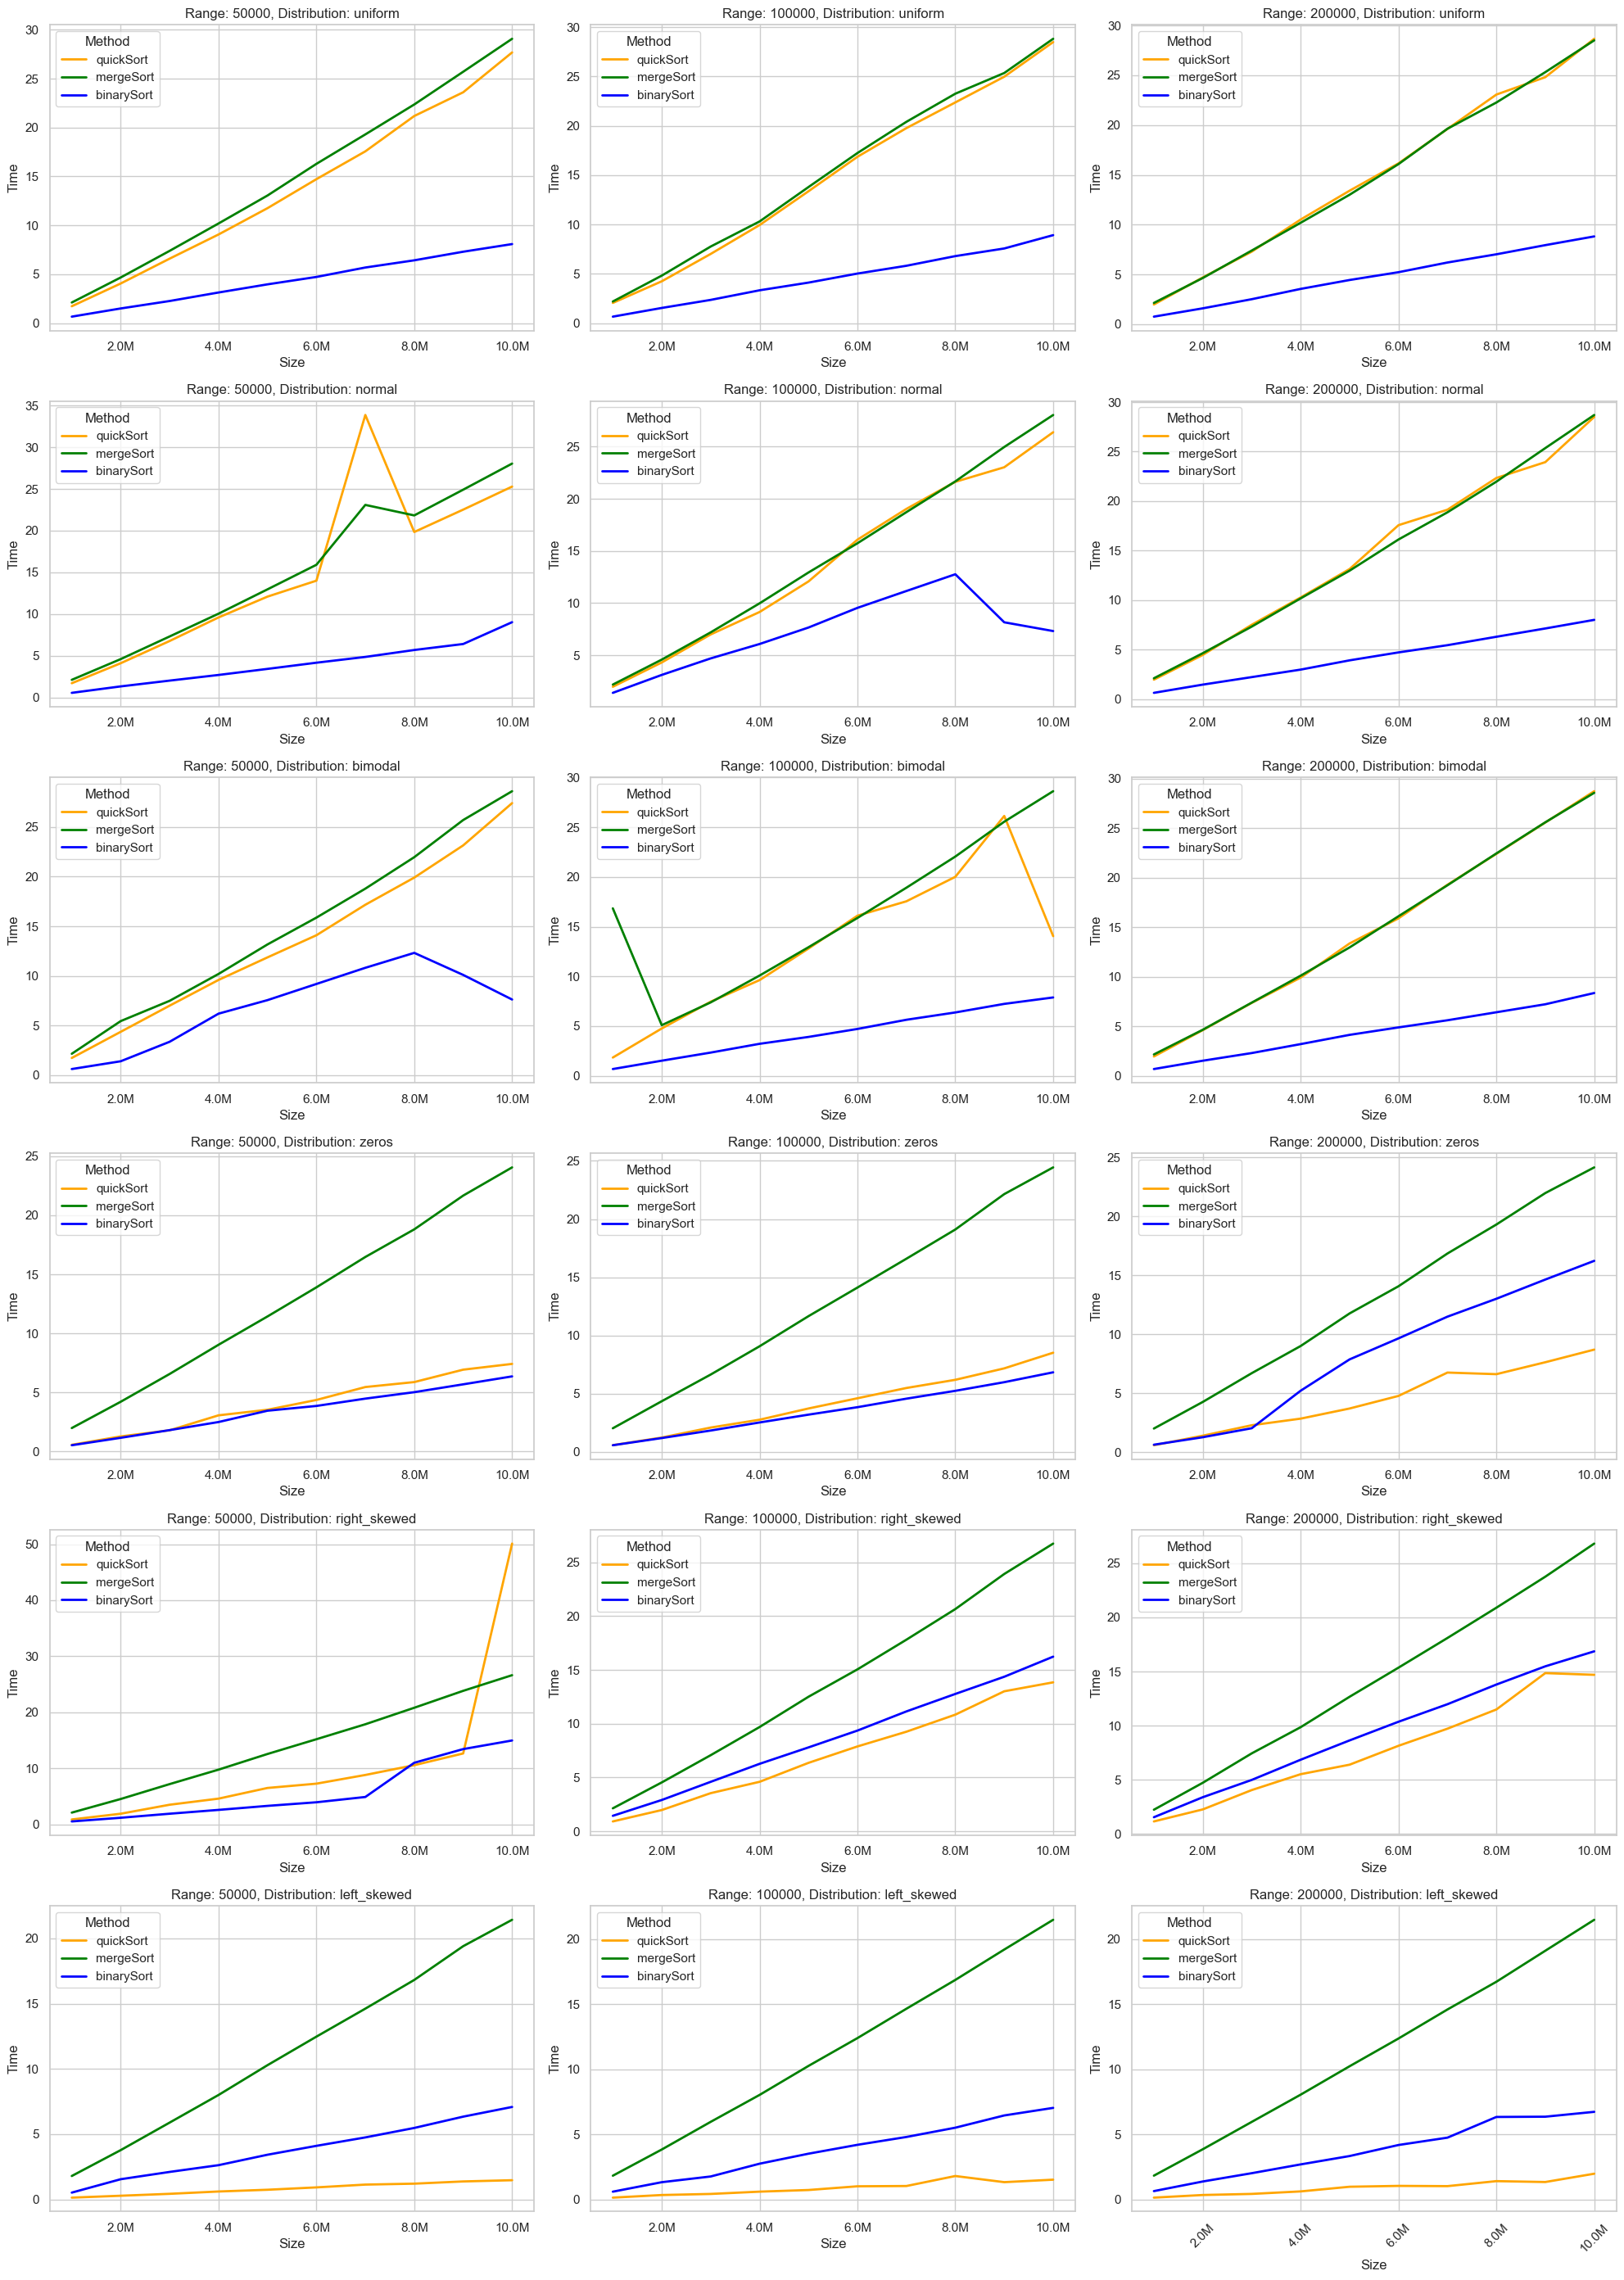

In [60]:
ranges = [50000, 100000, 200000]
distributions = ['uniform', 'normal', 'bimodal', 'zeros', 'right_skewed', 'left_skewed']

fig, axs = plt.subplots(6, 3, figsize=(20, 28))  

axs = axs.flatten()

ax_index = 0

for dist in distributions:
    for r in ranges:
        filtered_df = df[(df['range'] == r) & (df['distribution'] == dist)]
        
        ax = axs[ax_index]
        
        for method in filtered_df['method'].unique():
            subset = filtered_df[filtered_df['method'] == method]
            ax.plot(subset['size'], subset['time'], label=method,  color=color_map.get(method, 'black'), linewidth=2)

        
        ax.set_xlabel('Size')
        ax.set_ylabel('Time')
        ax.set_title(f'Range: {r}, Distribution: {dist}')
        ax.legend(title='Method')
        ax.grid(True)
        
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_number))
        plt.xticks(rotation=45)

        ax_index += 1

plt.tight_layout()
plt.show()



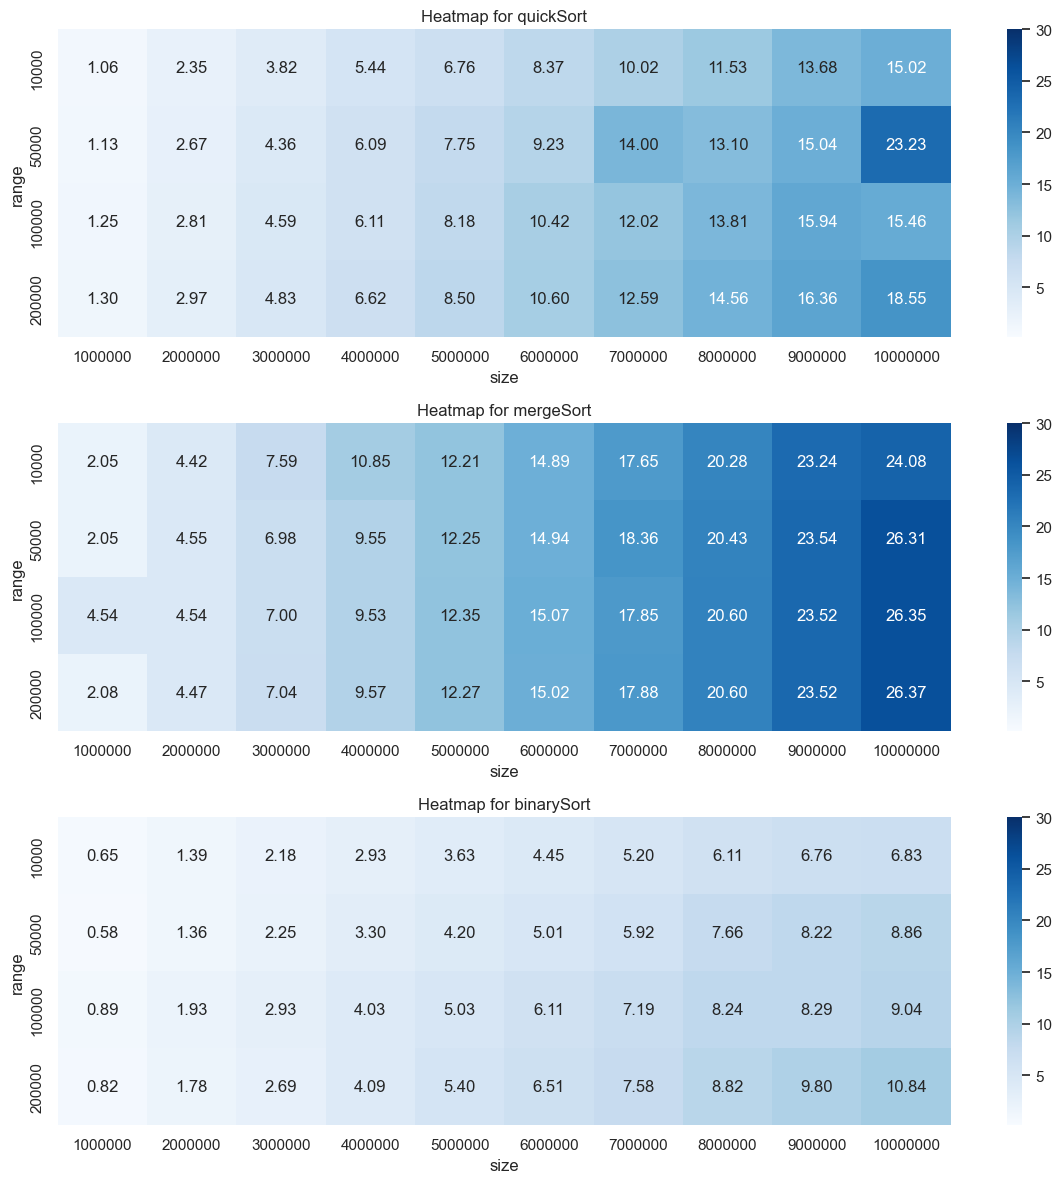

In [61]:

# Configurar el estilo de los gráficos
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Encontrar los valores mínimo y máximo de 'time' en todo el DataFrame para establecer un rango común
vmin = df['time'].min()
vmax = 30 #df['time'].max()

# Crear una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Crear un heatmap para cada método
methods = df['method'].unique()

# Aplanar los ejes para acceder a ellos fácilmente
axes = axes.flatten()

for i, method in enumerate(methods):
    # Filtrar el DataFrame para cada método
    df_method = df[df['method'] == method]
    
    # Crear una tabla pivotante con 'size' como filas, 'range' como columnas y 'time' como valores
    pivot_table = df_method.pivot_table(index="range", columns="size", values="time")
    
    # Crear el heatmap en el subplot correspondiente con el mismo rango de colores
    sns.heatmap(pivot_table, ax=axes[i], annot=True, fmt=".2f", cmap="Blues", vmin=vmin, vmax=vmax)
    axes[i].set_title(f"Heatmap for {method}")
    
    # Aplicar la función de formato a las etiquetas de los ejes si es necesario

# Ajustar el diseño para que no se superpongan
plt.tight_layout()
plt.show()


In [64]:
ranges = df["range"].unique()
distributions = df["distribution"].unique()
sizes = df["size"].unique()
quickSort = 0
mergeSort = 0
binarySort = 0

for ran in ranges:
    for dist in distributions:
        for si in sizes:
            temp = df[(df["range"] == ran) & (df["distribution"] == dist) & (df["size"] == si )]

            if temp.iloc[0]["time"] < temp.iloc[1]["time"] and temp.iloc[0]["time"] < temp.iloc[2]["time"]:
                method_with_min_time = temp.iloc[0]["method"]

            elif temp.iloc[1]["time"] < temp.iloc[0]["time"] and temp.iloc[1]["time"] < temp.iloc[2]["time"]:
                method_with_min_time =temp.iloc[1]["method"]

            elif temp.iloc[2]["time"] < temp.iloc[1]["time"] and temp.iloc[2]["time"] < temp.iloc[0]["time"] :
                method_with_min_time =temp.iloc[2]["method"]


            
            if method_with_min_time == 'quickSort':
                quickSort += 1
            if method_with_min_time == 'mergeSort':
                mergeSort += 1
            if method_with_min_time == 'binarySort':
                binarySort += 1


methods = [ 'binarySort', 'mergeSort', 'quickSort' ]
times = [binarySort, mergeSort, quickSort ] 

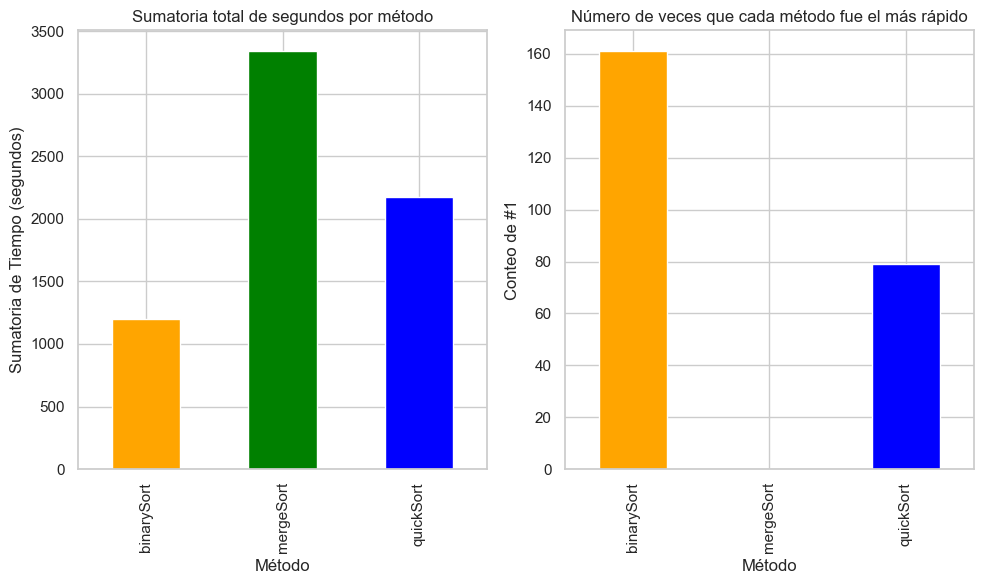

In [65]:
#fastest_method_counts = df.loc[df.groupby(['size', 'range'])['time'].idxmin()]['method'].value_counts()
fastest_method_counts = pd.Series(times, index=methods)
total_time_per_method = df.groupby('method')['time'].sum()

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(10, 6))  # figsize ajusta el tamaño total del lienzo

# Gráfico 1: Sumatoria total de segundos por método
total_time_per_method.plot(kind='bar', color=colors, ax=axes[0], title='Sumatoria total de segundos por método')
axes[0].set_xlabel('Método')
axes[0].set_ylabel('Sumatoria de Tiempo (segundos)')

# Gráfico 2: Número de veces que cada método fue el más rápido
fastest_method_counts.plot(kind='bar', color=colors, ax=axes[1], title='Número de veces que cada método fue el más rápido')
axes[1].set_xlabel('Método')
axes[1].set_ylabel('Conteo de #1')

# Ajustar el diseño para que no se superpongan
plt.tight_layout()

# Mostrar la gráfica
plt.show()